<a href="https://colab.research.google.com/github/ArincDemirel/PyTorch--Deep-Learning-Projects/blob/main/03_PyTorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 03.PyTorch Computer Vision
https://www.learnpytorch.io/03_pytorch_computer_vision/

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt


In [ ]:
torch.__version__ , torchvision.__version__

('2.1.0+cu118', '0.16.0+cu118')

In [ ]:
# Getting dataset - Fashion MNIST

In [ ]:
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "data", #where to download the data
    train = True,
    download=True,
    transform= ToTensor(),
   target_transform=None
)
test_data = datasets.FashionMNIST(
    root = "data", #where to download the data
    train = False,
    download=True,
    transform= ToTensor(),
   target_transform=None
)

100%|██████████| 26421880/26421880 [00:02<00:00, 11127858.50it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 201821.82it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3801944.16it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6545097.60it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data), type(train_data)

(60000, 10000, torchvision.datasets.mnist.FashionMNIST)

In [ ]:
image, label = train_data[0]
class_names = train_data.classes
len(class_names),class_names

(10,
 ['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'])

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets[:5], len(train_data.targets)

(tensor([9, 0, 0, 3, 0]), 60000)

In [ ]:
print(f"Image shape:{image.shape} -> [color_channels, height, width]")
print(f"Image label:{class_names[label]}")

Image shape:torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label:Ankle boot


In [ ]:
# So this is a 1 color chanel which is grayscale image

(-0.5, 27.5, 27.5, -0.5)

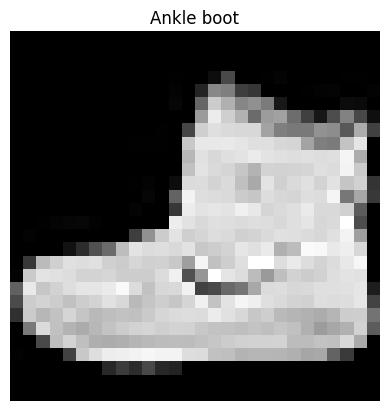

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"{class_names[label]}")
plt.axis(False)

In [ ]:
random_idx = torch.randint(0, len(train_data),size=[1]).item()
random_idx

12954

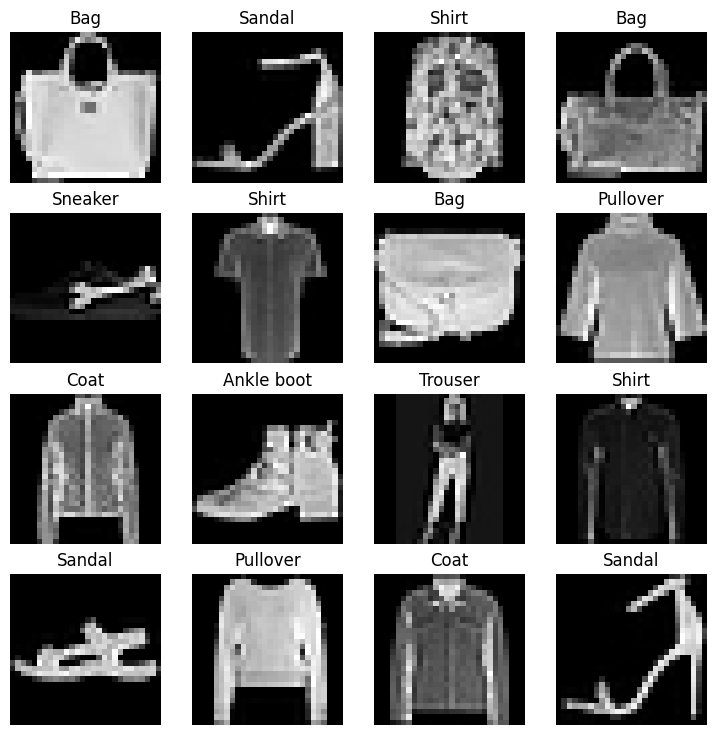

In [ ]:
rows , cols = 4,4
plt.show()
fig = plt.figure(figsize=(9,9))
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data),size=[1]).item()
  new_image, label = train_data[random_idx]
  fig.add_subplot(rows, cols,i)
  plt.imshow(new_image.squeeze(), cmap="gray")
  plt.title(f"{class_names[label]}")
  plt.axis(False)

In [ ]:
from torch.utils.data import DataLoader
# We have 6000 datapoints, let's do batch_size = 32, to divide into batches we can use dataloader from pytorch
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=32,
                              shuffle=False)

In [ ]:
len(train_dataloader) # 1875*32 = 60000

1875

In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
train_features_batch[5].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Pullover')

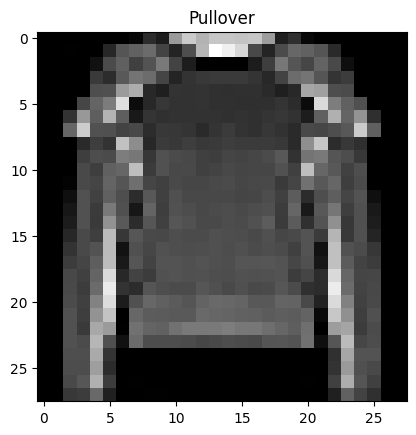

In [ ]:
train_features_batch[9][0,:,:],train_labels_batch[5]
plt.imshow(train_features_batch[4][0,:,:], cmap= "gray")
plt.title(class_names[train_labels_batch[4]])

In [ ]:
# To flatten the input we will use nn.flatten
flatten_model = nn.Flatten()
x = train_features_batch[0]
output = flatten_model(x)
x.shape, output.shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [ ]:
from torch.nn.modules.flatten import Flatten
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(nn.Flatten(),
                                     nn.Linear(in_features=input_shape, out_features=hidden_units),
                                     nn.Linear(in_features=hidden_units, out_features=output_shape)
                                     )
  def forward(self,x):
    return self.layer_stack(x)

In [ ]:
device = "cuda" if torch.cuda.is_available else "cpu"
# device = "cpu"

In [ ]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(input_shape = 784,
                               hidden_units=10,
                               output_shape=len(class_names)).to("cpu")

In [34]:
#test the model
dummy_x = torch.randn([1,1,28,28])
model_0(dummy_x).shape

torch.Size([1, 10])

In [35]:
import helper_functions as hlpfnc
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_0.parameters(),lr = 0.1 )

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
from timeit import default_timer as timer

In [39]:
def print_train_time(start:float, end:float, device: torch.device = None):
  total_time = end - start
  print(f"Total time elapsed on {device}:{total_time} seconds")
  return


Creating a training loop and training a model on batches of data
1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss per batch.
3. Loop through testing batches, perform testing steps, calcula he test loss per batch.
4. Print out what's happening.
5. Time it all (for fun).

In [41]:
from torch.nn.modules import loss
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch+1}\n----")
  train_loss,train_acc = 0,0
  for batch,(X_train,y_train) in enumerate(train_dataloader):

    model_0.train() # put the model in to the training mode

    #do the forward pass
    y_pred = model_0(X_train)

    # calculate the loss
    loss = loss_fn(y_pred,y_train)
    train_loss += loss # accumalate train loss
    train_acc += hlpfnc.accuracy_fn(y_true = y_train, y_pred = y_pred.argmax(dim=1))

    #optimizer zero grad
    optimizer.zero_grad()

    #loss backward - calculating the gradients
    loss.backward()

    #update the weights
    optimizer.step()

    if batch % 800 == 0:
      print(f"Looked at {batch * len(X_train)}/{len(train_dataloader.dataset)} samples.")

  train_loss /= len(train_dataloader) # averaging out the acumulated values
  train_acc /= len(train_dataloader)

  test_loss, test_acc = 0, 0

  model_0.eval()# put the model in to the evaluation mode before testing starts

  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      test_pred = model_0(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += hlpfnc.accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader) # averaging out the acumulated values

  print(f"\nLoss: {train_loss:.5f} , Train acc: {train_acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

train_time_end_on_cpu = timer()
print_train_time(train_time_start_on_cpu, train_time_end_on_cpu, device = device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch:1
----
Looked at 0/60000 samples.
Looked at 25600/60000 samples.
Looked at 51200/60000 samples.

Loss: 0.48957 , Train acc: 82.81% | Test loss: 0.48935, Test acc: 82.71%

Epoch:2
----
Looked at 0/60000 samples.
Looked at 25600/60000 samples.
Looked at 51200/60000 samples.

Loss: 0.46066 , Train acc: 83.83% | Test loss: 0.47449, Test acc: 83.50%

Epoch:3
----
Looked at 0/60000 samples.
Looked at 25600/60000 samples.
Looked at 51200/60000 samples.

Loss: 0.44683 , Train acc: 84.34% | Test loss: 0.47256, Test acc: 83.58%

Epoch:4
----
Looked at 0/60000 samples.
Looked at 25600/60000 samples.
Looked at 51200/60000 samples.

Loss: 0.43712 , Train acc: 84.64% | Test loss: 0.46116, Test acc: 83.75%

Epoch:5
----
Looked at 0/60000 samples.
Looked at 25600/60000 samples.
Looked at 51200/60000 samples.

Loss: 0.43188 , Train acc: 84.87% | Test loss: 0.46635, Test acc: 83.21%

Total time elapsed on cuda:57.10122054599998 seconds


In [42]:
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [43]:
from torch.nn.modules.flatten import Flatten
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(nn.Flatten(),
                                     nn.Linear(in_features=input_shape, out_features=hidden_units),
                                     nn.ReLU(),
                                     nn.Linear(in_features=hidden_units, out_features=output_shape),
                                     nn.ReLU(),
                                     )
  def forward(self,x):
    return self.layer_stack(x)

In [45]:
model_1 = FashionMNISTModelV1(input_shape=28*28,
                              hidden_units=8,
                              output_shape=len(class_names)).to(device)

In [46]:
model_1.parameters()

<generator object Module.parameters at 0x7aa9104feb90>

In [52]:
def train_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              optimizer: torch.optim.Optimizer,
              loss: torch.nn.Module,
              device : torch.device = device):
  model_0.train() # put the model in to the training mode

  train_loss,train_acc = 0,0
  for batch,(X_train,y_train) in enumerate(train_dataloader):
    X_train = X_train.to(device)
    y_train = y_train.to(device)

    #do the forward pass
    y_pred = model(X_train)

    # calculate the loss
    loss = loss_fn(y_pred,y_train)
    train_loss += loss # accumalate train loss
    train_acc += hlpfnc.accuracy_fn(y_true = y_train,
                                    y_pred = y_pred.argmax(dim=1)) # go from logits -> prediction labels

    #optimizer zero grad
    optimizer.zero_grad()

    #loss backward - calculating the gradients
    loss.backward()

    #update the weights
    optimizer.step()

  train_loss /= len(data_loader) # averaging out the acumulated values
  train_acc /= len(data_loader)
  print(f"\n Train Loss: {train_loss:.5f} , Train acc: {train_acc:.2f}% ")


In [53]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              optimizer: torch.optim.Optimizer,
              loss: torch.nn.Module,
              device : torch.device = device):

  test_loss, test_acc = 0, 0
  model.eval()# put the model in to the evaluation mode before testing starts

  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      test_pred = model_0(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += hlpfnc.accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader) # averaging out the acumulated values

  print(f"\n Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")



In [55]:
train_time_start_on_gpu = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  train_step(model= model_1,
            data_loader=train_dataloader,
            optimizer= optimizer,
            loss_fn = loss_fn,
            device = device)
  test_step(model= model_1,
            data_loader=train_dataloader,
            optimizer= optimizer,
            loss_fn = loss_fn,
            device = device)


train_time_end_on_gpu = timer()
print_train_time(train_time_start_on_gpu, train_time_end_on_gpu, device = device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-----

Loss: 2.31106 , Train acc: 10.10% 

 Test loss: 0.46635, Test acc: 83.21%

Epoch: 1
-----

Loss: 2.31107 , Train acc: 10.10% 

 Test loss: 0.46635, Test acc: 83.21%

Epoch: 2
-----

Loss: 2.31106 , Train acc: 10.10% 

 Test loss: 0.46635, Test acc: 83.21%

Epoch: 3
-----

Loss: 2.31106 , Train acc: 10.10% 

 Test loss: 0.46635, Test acc: 83.21%

Epoch: 4
-----

Loss: 2.31107 , Train acc: 10.10% 

 Test loss: 0.46635, Test acc: 83.21%

Total time elapsed on cuda:50.44365926600017 seconds
